![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               47.662353        18.748235         196.917647  3898.235294
1               47.568067        14.996639         217.235294  5092.436975
2               38.305469        18.098437         188.554688  3587.500000


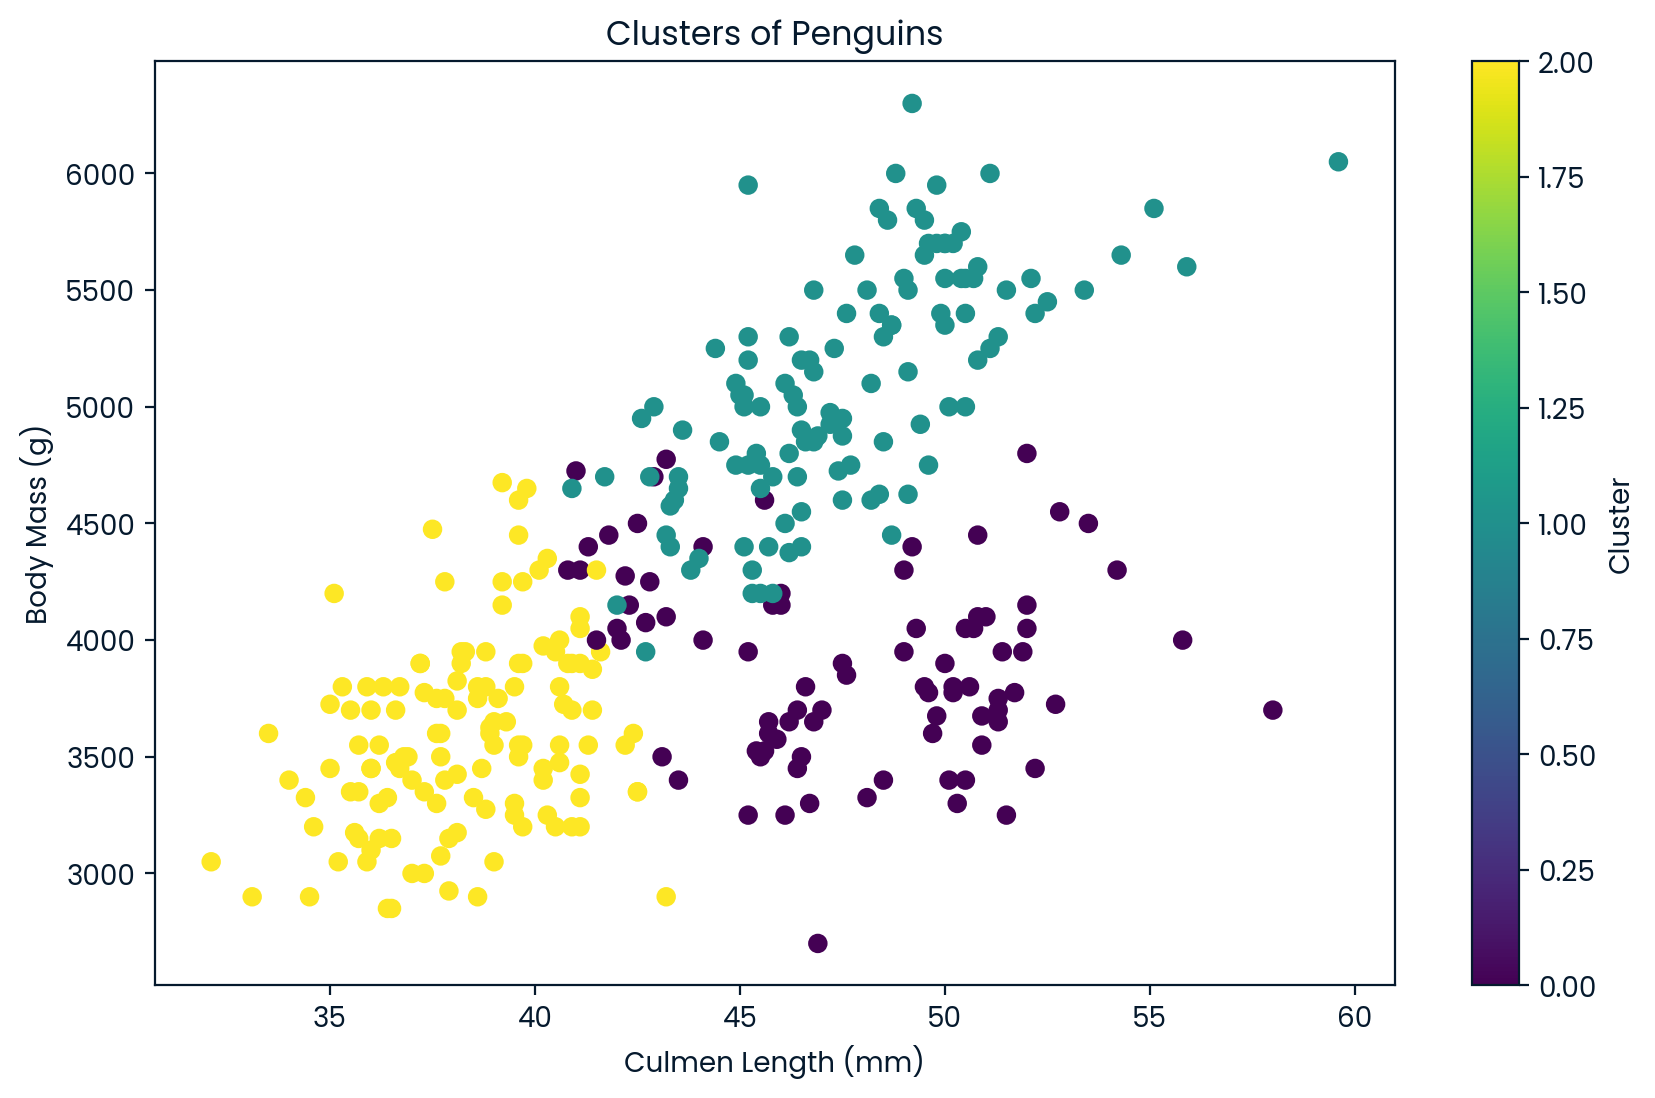

In [5]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

#Check for missing values
print(penguins_df.isnull().sum())

# Drop rows with missing values
penguins_df = penguins_df.dropna()

# Convert 'sex' column to numeric
penguins_df['sex'] = penguins_df['sex'].map({'MALE': 1, 'FEMALE': 0})

# Select only the numeric columns
numeric_df = penguins_df.drop('sex', axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Define the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(scaled_data)

# Assign cluster labels to the original dataframe
penguins_df['cluster'] = kmeans.labels_

# Calculate the mean of the original variables by cluster
stat_penguins = penguins_df.groupby('cluster').mean()

# Drop non-numeric columns (if any)
stat_penguins = stat_penguins.drop('sex', axis=1, errors='ignore')

# Display the result
print(stat_penguins)


# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['body_mass_g'], c=penguins_df['cluster'], cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Clusters of Penguins')
plt.colorbar(label='Cluster')
plt.show()
